In [1]:
# 의사결정트리 모델
from sklearn.tree import DecisionTreeClassifier
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/Boston_house.csv")
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<ipython-input-6-0e84456b2055>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


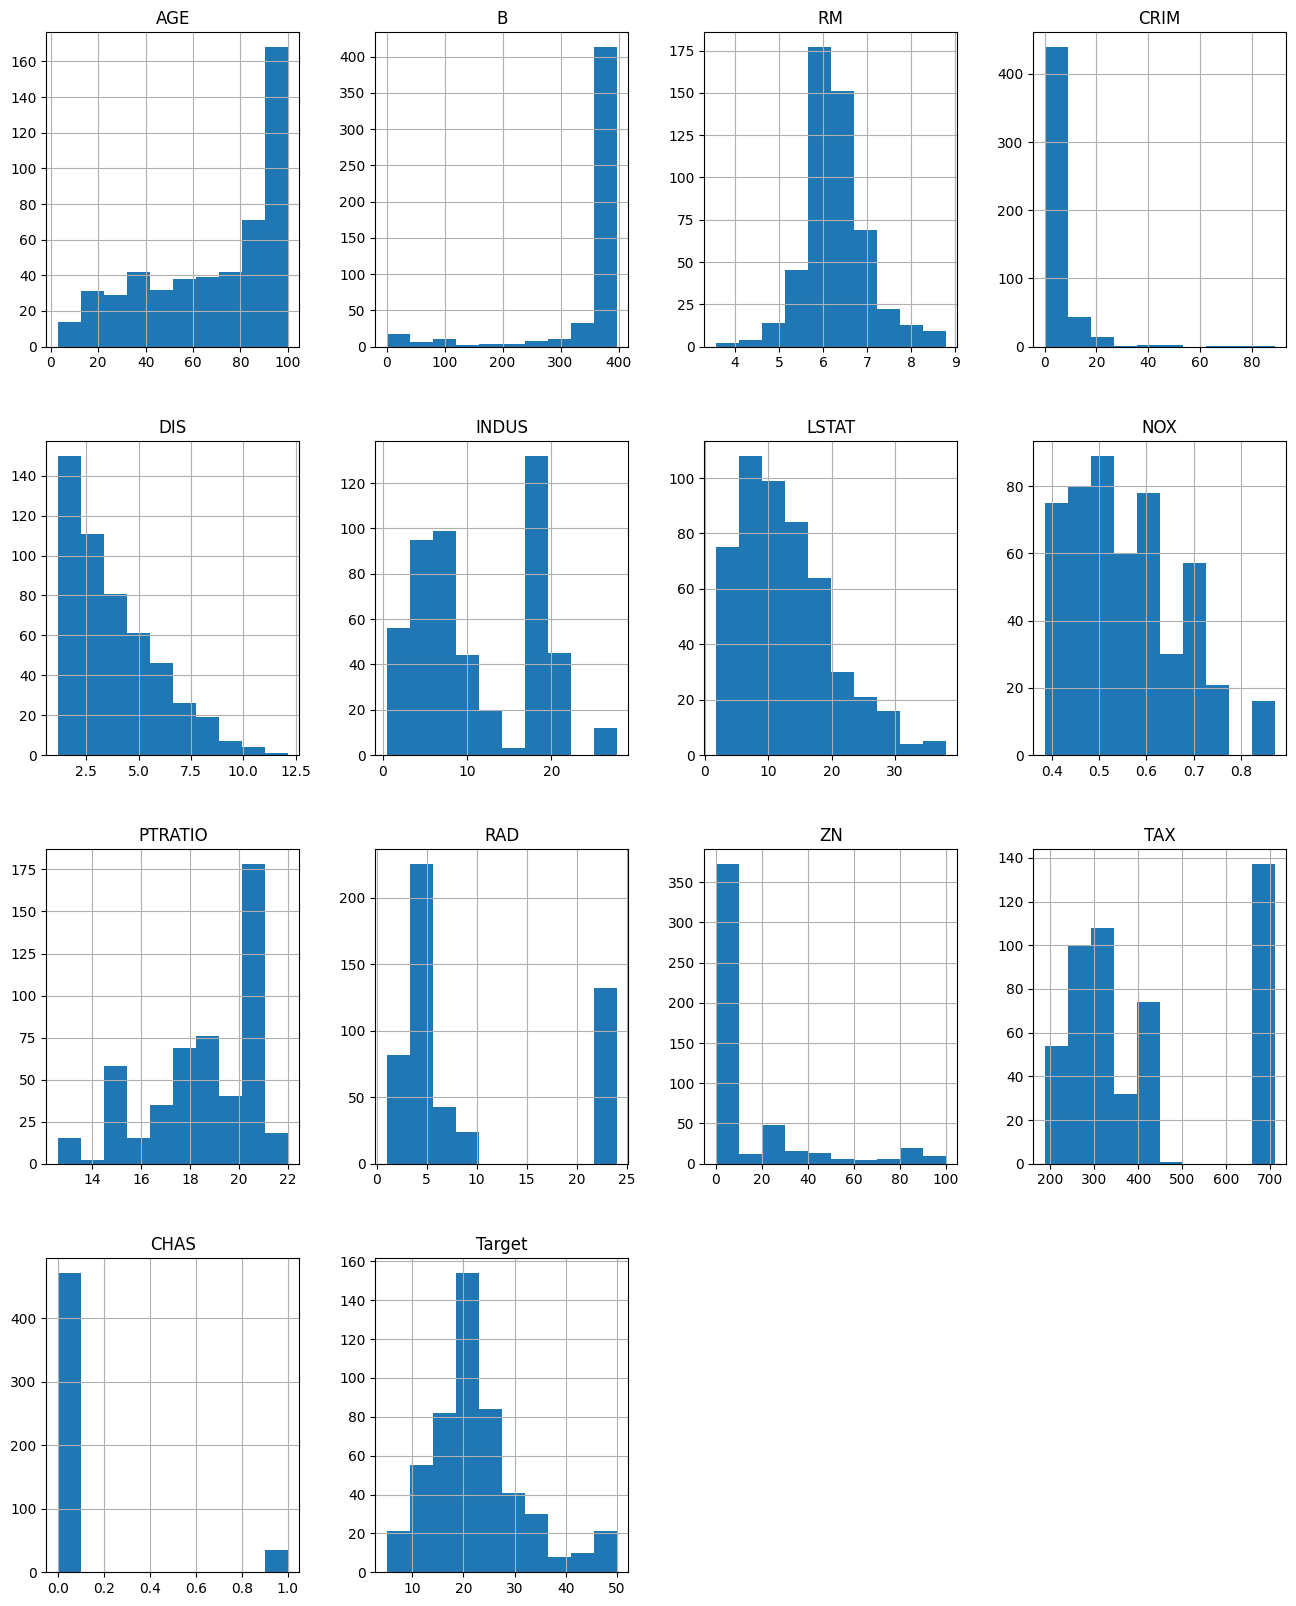

In [6]:

numerical_columns=['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'ZN', 'TAX', 'CHAS', 'Target']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다.

df[numerical_columns].hist(ax=ax)
plt.show()


In [9]:
df['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [10]:
cols = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'ZN', 'TAX', 'CHAS', 'Target']

corr = df[cols].corr(method = 'pearson')
corr

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


In [12]:
threshold = 550
# 새로운 열 생성 - 기준 값보다 크면 1, 아니면 0
df['TAX_Threshold'] = df['TAX'].apply(lambda x: 1 if x > threshold else 0)

df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target,TAX_Threshold
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2,0


In [19]:
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target,TAX_Threshold
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4,0
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6,0
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9,0
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0,0


In [18]:
df_x_data = df.loc[:,['RAD','INDUS']]

df_x_data

,RAD,INDUS
0,1,2.31
1,2,7.07
2,2,7.07
3,3,2.18
4,3,2.18
...,...,...
501,1,11.93
502,1,11.93
503,1,11.93
504,1,11.93


In [21]:
df_y_data = df['TAX_Threshold']

df_y_data

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: TAX_Threshold, Length: 506, dtype: int64

In [22]:
# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
    df_x_data,
    df_y_data,
    test_size=0.2,
    random_state=11,
    stratify=df_y_data
)


In [23]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [24]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 1.0000


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [27]:
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(dt_clf , df_x_data , df_y_data ,scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [1.     0.9307 1.     1.     0.9505]
평균 검증 정확도: 0.9762


In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# 교차 검증 수행
scores = cross_val_score(dt_clf, df_x_data, df_y_data, cv=skf, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0
